# Homework

In [42]:
# Setting dependencies, etc.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

df = pd.read_csv('weather/temperature.csv')

In [114]:
# Converting datetime dtype, in case we need to use it below. 

df['datetime'] = pd.to_datetime(df['datetime'])

### 1. Write a function that efficiently converts every column to a different temperature scale

Here I convert the Kelvin scale to Celsius by subtracting 273.15 from each entry using a lambda function. Rather than make sure x was an element in a list, I chose to apply lambda to all columns except 'datetime'. 


In [25]:
df_Celsius = df.apply(lambda x: x - 273.15 if x.name != 'datetime' else x)

### 2. Write a function that efficiently fills in missing values in every column, except for trailing NANs.  

That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end

In [117]:
# Here I'm using the "Akima" method of interpolation. 
#I chose Akima because I wasn't able to run the linear interpolation without errors. 
# Akima, named after its author (1969), is a method of fitting a smooth curve to data.
# It performs local fitting of values and uses nearby values to determine the coefficients of a cubic function.

df_interp = df_Celsius.interpolate(method='akima', limit=1)


### 3. Find cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average

In [118]:
# I used a primitive approach - I used the describe method, scanned the min and max temps by eye,
# and chose Denver (A) and Seattle (B). By definition, the min and max are the extreme values in a range,
# but I thought they'd be a useful first diagnosic tool for separating cities.

df_interp.describe()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
count,44459.000000,45252.000000,44460.000000,45251.000000,45251.000000,45252.000000,45252.000000,45251.000000,45252.000000,45252.000000,...,45251.000000,44460.000000,45251.000000,45251.000000,44456.000000,44460.000000,44461.000000,44456.000000,44458.000000,44460.000000
mean,10.712533,11.842929,15.005821,11.260000,17.695950,17.065044,19.274887,22.343031,12.467856,9.689407,...,12.223901,12.250406,7.192803,10.629531,18.371825,21.362307,23.347276,22.116257,20.944374,20.034253
std,6.640105,7.452438,5.332862,6.548397,6.460848,5.889992,10.829522,9.916876,9.853484,10.673464,...,10.242422,10.220932,11.953575,9.802587,7.821801,6.676412,8.852984,6.324565,6.304312,7.093583
min,-28.000000,-10.780000,-0.850000,-9.370000,-6.646333,-7.366667,-12.588667,-7.091000,-18.107667,-25.422333,...,-22.760000,-22.376000,-29.850000,-23.610000,-0.971000,-2.101000,-2.000000,-2.000000,-4.468000,-0.176000
25%,6.010000,6.700000,11.520000,6.680000,13.230000,13.104750,10.770000,14.530000,4.820000,1.910000,...,4.200174,4.220000,-1.180000,2.940000,12.216000,16.300000,16.584000,17.317333,16.730991,14.374279
50%,10.300000,11.170000,14.460000,10.790000,17.380000,16.968750,18.877486,22.435667,12.970000,9.820667,...,12.777500,12.720000,7.959000,10.982500,17.781333,21.750000,23.000000,21.670000,21.000000,19.846000
75%,15.450523,16.301750,17.865167,15.380000,21.930000,20.957542,27.685000,29.900000,19.685643,17.530000,...,20.646000,20.610000,17.219167,18.470000,24.120000,26.650000,30.000000,26.510000,25.780000,26.000000
max,33.850000,39.370000,40.470000,34.150000,42.320000,40.210000,45.490000,48.070000,39.560000,40.600000,...,34.850000,37.090000,34.730000,34.850000,41.670000,47.780000,47.000000,47.780000,40.000000,43.890000


### 4. For the two cities you found in for problem 4 (there are many possible answers), clean up the data via aggregation or rolling averages and plot a clear visual

In what follows, I'm doing several things - using aggregation and looking at the time series for each city, using the built in method for rolling averages, and finally, creating an exponential rolling average series and plotting those data,

In [119]:
df_interp['date']=df_interp['datetime'].dt.date

In [120]:
# Inspecting the Denver data

px.line(df_interp.groupby('date').agg({'Denver':'mean'}).reset_index(), x='date', y='Denver')

In [121]:
# Inspecting the Seattle data

px.line(df_interp.groupby('date').agg({'Seattle':'mean'}).reset_index(), x='date', y='Seattle')

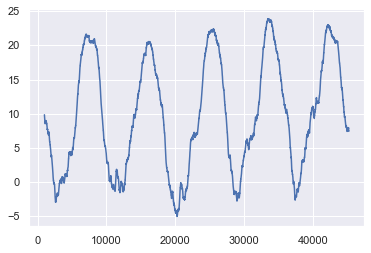

In [122]:
# Let's check out the rolling average of Denver data

plt.plot(df_interp['Denver'].rolling(1000).mean());

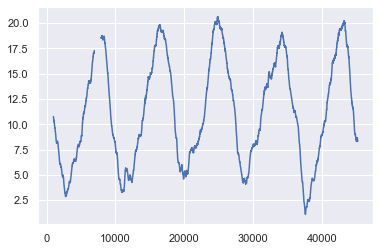

In [123]:
# Rolling average of Seattle data for comparison

plt.plot(df_interp['Seattle'].rolling(1000).mean());

In [124]:
denver = df_interp[['Denver']]

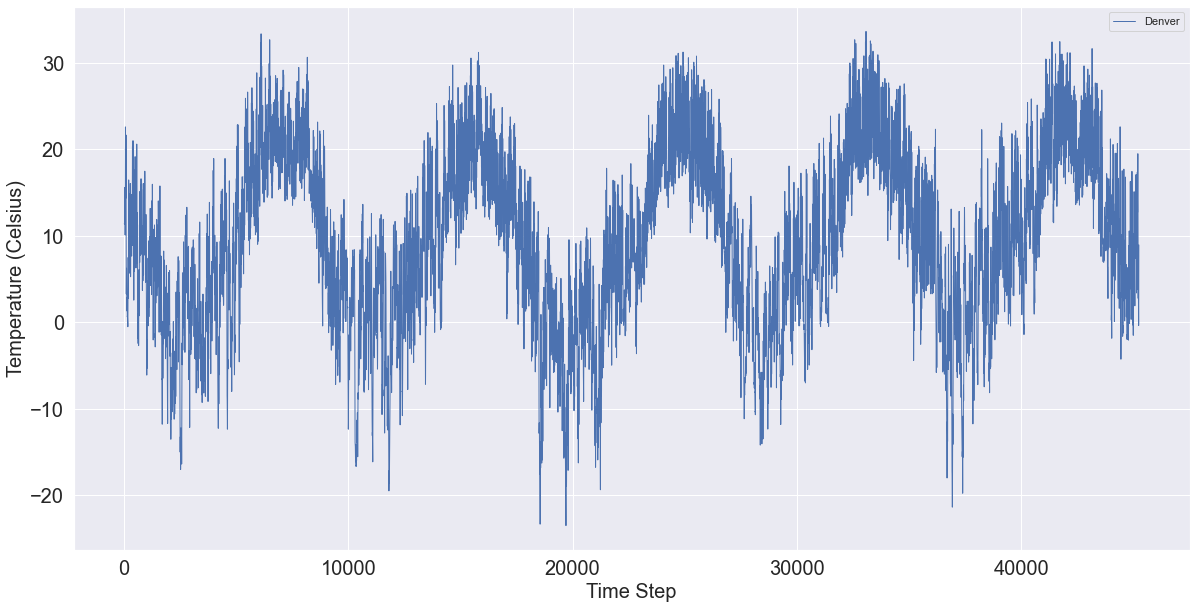

In [132]:
denver.rolling(12).mean().plot(figsize=(20,10), linewidth = 1, fontsize = 20)
plt.ylabel('Temperature (Celsius)', fontsize = 20)
plt.xlabel('Time Step', fontsize = 20);

In [48]:
seattle = df_interp[['Seattle']]

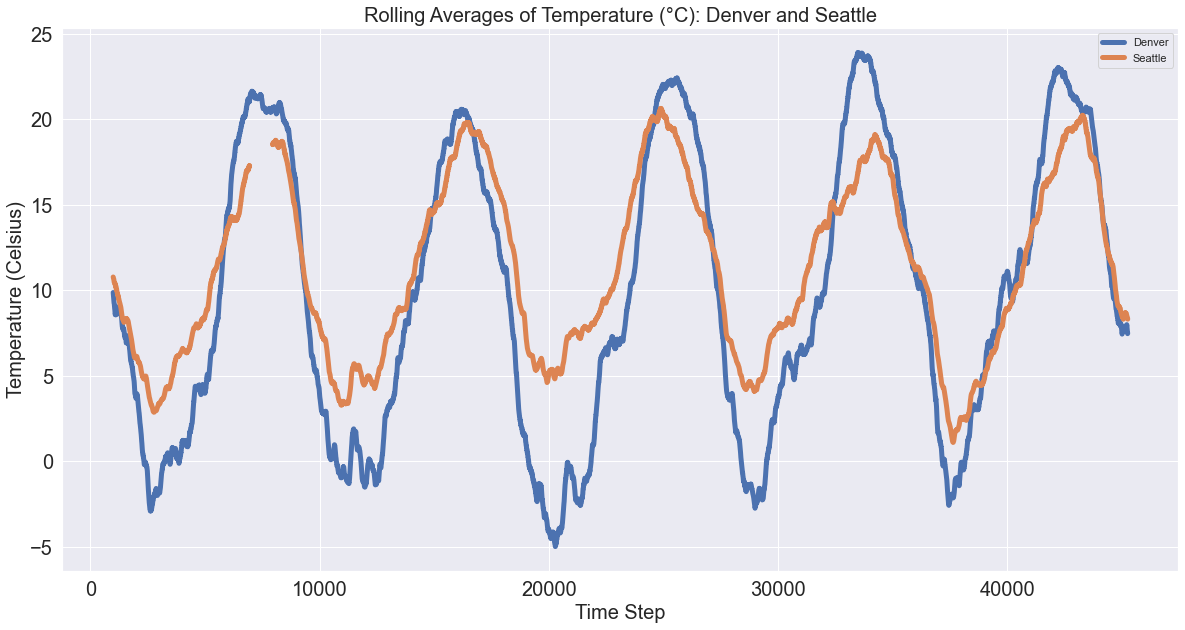

In [131]:
df_ravg = pd.concat([denver.rolling(1000).mean(), seattle.rolling(1000).mean()], axis = 1)
df_ravg.plot(figsize = (20,10), linewidth = 5, fontsize = 20)
plt.title('Rolling Averages of Temperature (°C): Denver and Seattle', fontsize = 20)
plt.ylabel('Temperature (Celsius)', fontsize = 20)
plt.xlabel('Time Step', fontsize=20);


In this figure, we see that the extreme values for summer and winter are less than those for Denver. There's a greater difference in winter extremes between the two cities; summer extremes are closer together. These observations are consistent with differences in altitude (sea level vs. 5000+ m), location (coast vs. interior), and relative humidity in winter. 


I will duplicate the exponential smoothing method used in class and then overlay the two plots.

In [134]:
# Exponential smoothing for Denver

smoothed_denver = np.zeros(len(df_interp)-1)

factor = 0.001

for k in range(len(df_interp)-1):
    if k == 0:
        smoothed_denver[k]=df_interp.iloc[1]['Denver']
    else:
        current_data = df_interp.iloc[k]['Denver']
        if np.isnan(current_data):
            smoothed_denver[k]=smoothed_denver[k-1]
        else:
            smoothed_denver[k] = (1-factor)*smoothed_denver[k-1] + factor*current_data
            

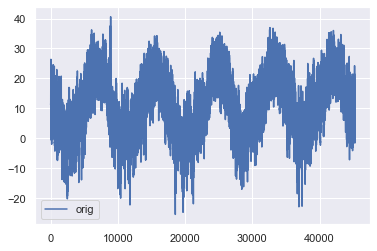

In [135]:
plt.plot(df_interp['Denver'], label='orig')

plt.legend();

In [58]:
# Exponential smoothing for Seattle

smoothed_seattle = np.zeros(len(df_interp)-1)

factor = 0.001

#tic = time.perf_counter()

for k in range(len(df_interp)-1):
    if k == 0:
        smoothed_seattle[k]=df_interp.iloc[1]['Seattle']
    else:
        current_data = df_interp.iloc[k]['Seattle']
        if np.isnan(current_data):
            smoothed_seattle[k]=smoothed_seattle[k-1]
        else:
            smoothed_seattle[k] = (1-factor)*smoothed_seattle[k-1] + factor*current_data
            

I'm going to make a new data frame so I can plot the dates.

In [136]:
sample = df_interp[['datetime']]

In [78]:
sample.drop(sample.index[0], inplace=True)
sample.head()

/Users/thevalkyrie/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,datetime
1,2012-10-01 13:00:00
2,2012-10-01 14:00:00
3,2012-10-01 15:00:00
4,2012-10-01 16:00:00
5,2012-10-01 17:00:00


In [137]:
sample_reset = sample.reset_index(level=0, drop=True)

In [138]:
denver_series = pd.Series(smoothed_denver)

In [139]:
seattle_series = pd.Series(smoothed_seattle)

In [140]:
df_final = pd.concat([sample_reset, denver_series, seattle_series], axis = 1)

In [141]:
df_final.columns = ['datetime', 'Denver', 'Seattle']
df_final = df_final.set_index('datetime')
#df_final.head()

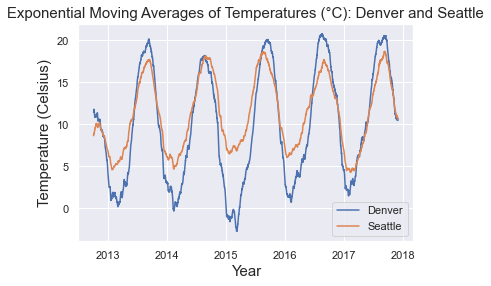

In [144]:
plt.plot(df_final['Denver'], label = 'Denver')
plt.plot(df_final['Seattle'], label = 'Seattle')
plt.title('Exponential Moving Averages of Temperatures (°C): Denver and Seattle', fontsize= 15)
plt.ylabel('Temperature (Celsius)', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.legend();